In [7]:
from FlagEmbedding import FlagModel
import numpy as np
from sklearn.manifold import TSNE
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from pprint import pprint as pp

In [ ]:
model = FlagModel('BAAI/bge-large-en-v1.5', 
                  query_instruction_for_retrieval="",
                  use_fp16=True)

In [2]:
from datasets import load_dataset, load_from_disk

In [3]:
root = "/mnt/bn/data-tns-live-llm/leon/datasets/fed_data/"
datas = []
for i in range(10):
    datas.append(load_from_disk(f"{root}/pos_{i}.parquet"))

In [5]:
print(datas[0])

Dataset({
    features: ['instruction', 'response', '__index_level_0__'],
    num_rows: 5100
})


In [6]:
embeddings = model.encode(datas[0]["instruction"])

Inference Embeddings: 100%|██████████| 3/3 [00:24<00:00,  8.19s/it]


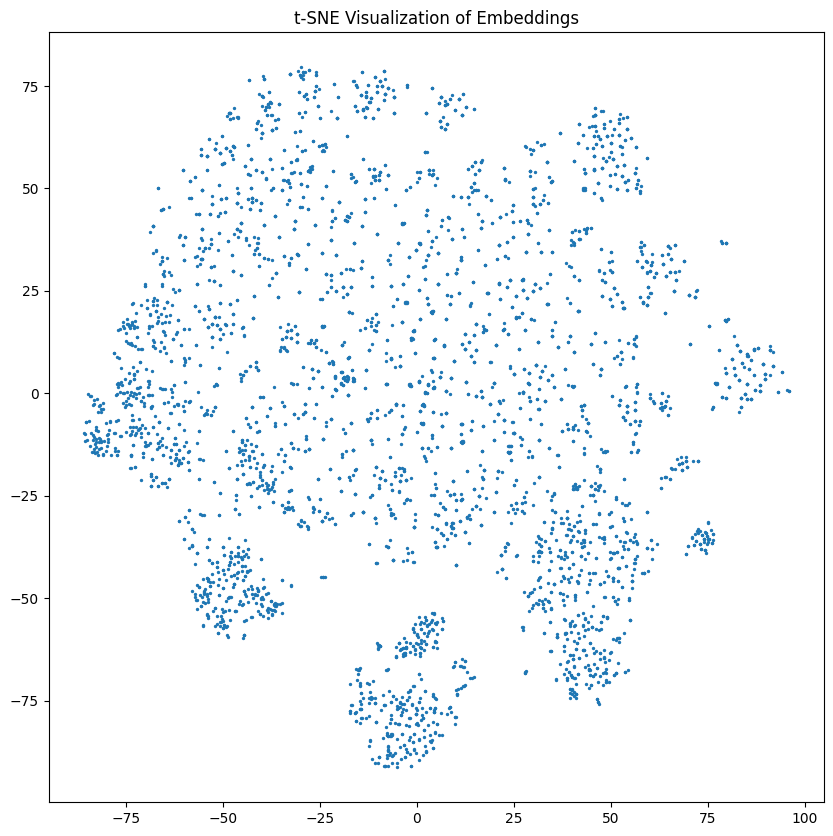

In [8]:
tsne_model = TSNE(n_components=2, random_state=0, metric='cosine')
tsne_results = tsne_model.fit_transform(embeddings)
# colors = ['red' if i < 20022 else 'blue' for i in range(len(tsne_results))]
plt.figure(figsize=(10, 10))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=2)
plt.title('t-SNE Visualization of Embeddings')
plt.show()